In [8]:
# Okay, here we will dive deeper into zinc. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [10]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


<Figure size 600x300 with 0 Axes>

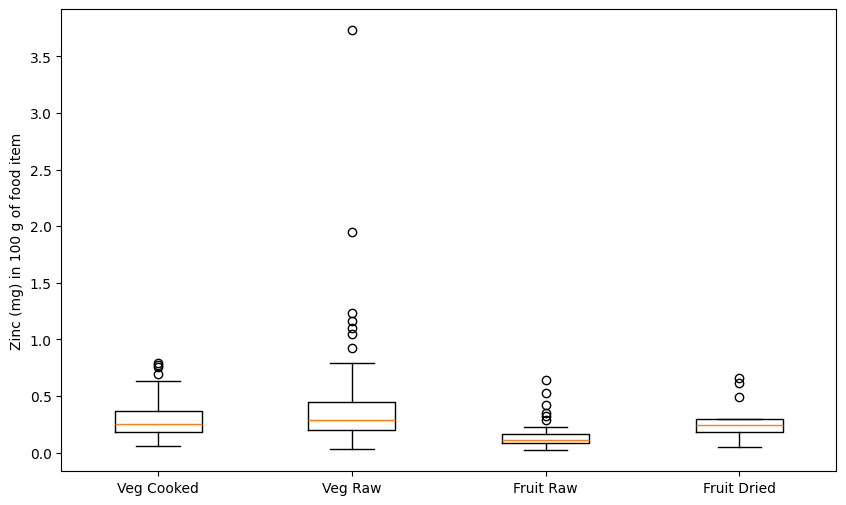

In [11]:
# Let's see how zinc content distributes between different food groups


data = [df_v_vc['zn_in_mg'], df_v_vr['zn_in_mg'], df_v_fr['zn_in_mg'], df_v_fd['zn_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Zinc (mg) in 100 g of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [12]:
# Top raw vegetables in 100g:

top = df_v_vr[['long_desc', 'zn_in_mg']].sort_values(by="zn_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  zn_in_mg
93                                Hearts of palm, raw      3.73
54                            Seaweed, irishmoss, raw      1.95
55                                 Seaweed, kelp, raw      1.23
29                                        Garlic, raw      1.16
3                                  Bamboo shoots, raw      1.10
56                                Seaweed, laver, raw      1.05
0                        Alfalfa seeds, sprouted, raw      0.92
28                                        Endive, raw      0.79
6                                  Broccoli raab, raw      0.77
20                                Chayote, fruit, raw      0.74
87                            Cauliflower, green, raw      0.64
82                                     Radicchio, raw      0.62
43                                      Parsnips, raw      0.59
53                                 Seaweed, agar, raw      0.58
40                                      

In [13]:
# Top raw vegetables in 100kcal:

top = df_v_vr[['long_desc', 'zn_mg_in_100kcal']].sort_values(by='zn_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  zn_mg_in_100kcal
28                                        Endive, raw          4.647059
3                                  Bamboo shoots, raw          4.074074
0                        Alfalfa seeds, sprouted, raw          4.000000
54                            Seaweed, irishmoss, raw          3.979592
20                                Chayote, fruit, raw          3.894737
6                                  Broccoli raab, raw          3.500000
93                                Hearts of palm, raw          3.243478
56                                Seaweed, laver, raw          3.000000
55                                 Seaweed, kelp, raw          2.860465
2                                      Asparagus, raw          2.700000
82                                     Radicchio, raw          2.695652
57                                       Spinach, raw          2.304348
53                                 Seaweed, agar, raw          2

<Figure size 600x300 with 0 Axes>

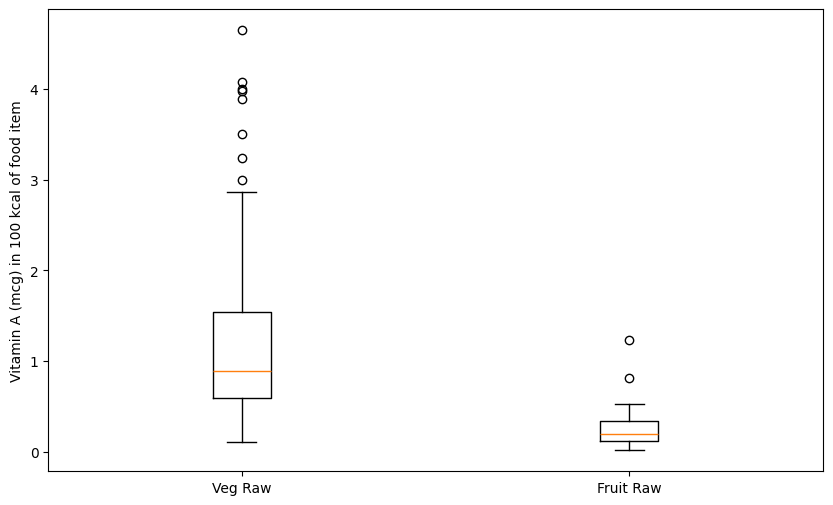

In [14]:
# Let's see how zinc content distributes between 100kcal of products:

data = [df_v_vr['zn_mg_in_100kcal'], df_v_fr['zn_mg_in_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin A (mcg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()